# 层次模型——泊松分布

接下来我们对于模型：$$x_{i}\sim P\left(\lambda_{i}\right),\lambda_{i}\sim\Gamma\left(\alpha,\beta\right)$$中的$\alpha,\beta$的后验分布进行画图。

In [1]:
import numpy as np
from scipy import special
np.random.seed(19880505)
x=np.random.poisson(10,50)
x

ModuleNotFoundError: No module named 'numpy'

## 第一种做法：计算贝叶斯后验分布

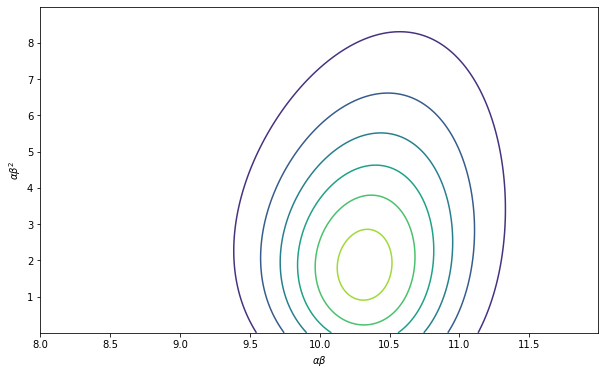

In [ ]:
## 计算后验
delta=0.005
## 重新参数化
a=np.arange(8,12,delta)
b=np.arange(0.001,9,delta)
A,B=np.meshgrid(a,b)
Alpha=A**2/B
Beta=B/A
## 计算log(pi)
log_pi=x.sum()*np.log(Beta)
log_pi-=len(x)*special.loggamma(Alpha)
for i in range(len(x)):
    log_pi+=special.loggamma(Alpha+x[i])
log_pi-=(len(x)*Alpha+x.sum())*np.log(1+Beta)
pi=np.exp(log_pi)
## 画图
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha\beta$')
ax.set_ylabel(r'$\alpha\beta^2$')
CS = ax.contour(A, B, pi)
fig.savefig("possion_hier_bayes.eps")

## 第二种方法：经验贝叶斯

In [ ]:
from scipy.optimize import minimize

def estimate(x):
    sum_x=x.sum()
    N=len(x)
    ## 目标函数
    def obj(theta):
        alpha=theta[0]
        beta=theta[1]
        return -(sum_x*np.log(beta)+ \
                 special.loggamma(alpha+x).sum() \
                 -N*special.loggamma(alpha) \
                 -(alpha*N+sum_x)*np.log(1+beta))
    ## 求最优化
    res=minimize(obj, np.array([1,1]), \
                 method='nelder-mead', \
                 options={'xtol': 1e-4, 'disp': True})
    return res

theta=estimate(x).x
print("alpha*beta=",theta[0]*theta[1])
print("alpha*beta^2=",theta[0]*theta[1]**2)

Optimization terminated successfully.
         Current function value: -688.734221
         Iterations: 162
         Function evaluations: 306
alpha*beta= 10.3199994976331
alpha*beta^2= 1.82303028330377


In [ ]:
lambda_i=(x+theta[0])*(theta[1]/(theta[1]+1))
lambda_i_sd=np.sqrt((x+theta[0])*(theta[1]/(theta[1]+1))**2)
print(np.vstack([x,lambda_i,lambda_i_sd]).T)


[[11.         10.42208782  1.25086596]
 [ 7.          9.82156873  1.21429398]
 [11.         10.42208782  1.25086596]
 [10.         10.27195805  1.24182395]
 [12.         10.57221759  1.25984309]
 [10.         10.27195805  1.24182395]
 [11.         10.42208782  1.25086596]
 [13.         10.72234736  1.2687567 ]
 [ 8.          9.9716985   1.22353946]
 [10.         10.27195805  1.24182395]
 [10.         10.27195805  1.24182395]
 [15.         11.0226069   1.28639864]
 [17.         11.32286645  1.30380188]
 [17.         11.32286645  1.30380188]
 [14.         10.87247713  1.27760812]
 [ 8.          9.9716985   1.22353946]
 [ 5.          9.52130919  1.19558855]
 [ 8.          9.9716985   1.22353946]
 [ 8.          9.9716985   1.22353946]
 [ 7.          9.82156873  1.21429398]
 [11.         10.42208782  1.25086596]
 [ 7.          9.82156873  1.21429398]
 [ 7.          9.82156873  1.21429398]
 [14.         10.87247713  1.27760812]
 [10.         10.27195805  1.24182395]
 [ 5.          9.52130919

## 实际数据应用：OHIE中的急诊次数

In [ ]:
import pandas as pd
data=pd.read_csv("../code_in_notes/datasets/OHIE_ED_visit.csv")
data.head(20)

person_id  sample_ed  ed_visit_09mar2008  ed_visit_30sep2009  \
0           5          1                   0                   0   
1           8          1                   0                   1   
2           9          1                   1                   0   
3          16          1                   1                   1   
4          18          1                   1                   0   
5          23          1                   0                   0   
6          24          1                   0                   0   
7          29          1                   1                   1   
8          30          1                   0                   0   
9          34          1                   0                   0   
10         37          1                   0                   0   
11         45          1                   1                   0   
12         47          1                   0                   0   
13         48          1                   0                   0   
14         50          1                   0                   0   
15         51          1                   1                   1   
16         52          1                   0                   0   
17         53          1                   0                   0   
18         54          1                   0                   0   
19         59          1                   0                   0   

    num_visit_pre_cens_ed  
0                     0.0  
1                     0.0  
2                     1.0  
3                     1.0  
4                     2.0  
5                     0.0  
6                     0.0  
7                     7.0  
8                     0.0  
9                     0.0  
10                    0.0  
11                    1.0  
12                    0.0  
13                    0.0  
14                    0.0  
15                    5.0  
16                    0.0  
17                    0.0  
18                    0.0  
19                    0.0

In [ ]:
data['num_visit_pre_cens_ed'].describe()

count    24634.000000
mean         0.774133
std          1.863151
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         17.000000
Name: num_visit_pre_cens_ed, dtype: float64

进行估计：

In [ ]:
theta=estimate(data['num_visit_pre_cens_ed']).x
print("alpha*beta=",theta[0]*theta[1])
print("alpha*beta^2=",theta[0]*theta[1]**2)

Optimization terminated successfully.
         Current function value: 12866.888199
         Iterations: 45
         Function evaluations: 87
alpha*beta= 0.7737660530364178
alpha*beta^2= 2.159100476763305


预测每一个人的$\lambda_i$

In [ ]:
data['pred_lambda']=(data['num_visit_pre_cens_ed']+theta[0])*(theta[1]/(theta[1]+1))
data['pred_lambda_sd']=np.sqrt((data['num_visit_pre_cens_ed']+theta[0])*(theta[1]/(theta[1]+1))**2)
data.head(20)

person_id  sample_ed  ed_visit_09mar2008  ed_visit_30sep2009  \
0           5          1                   0                   0   
1           8          1                   0                   1   
2           9          1                   1                   0   
3          16          1                   1                   1   
4          18          1                   1                   0   
5          23          1                   0                   0   
6          24          1                   0                   0   
7          29          1                   1                   1   
8          30          1                   0                   0   
9          34          1                   0                   0   
10         37          1                   0                   0   
11         45          1                   1                   0   
12         47          1                   0                   0   
13         48          1                   0                   0   
14         50          1                   0                   0   
15         51          1                   1                   1   
16         52          1                   0                   0   
17         53          1                   0                   0   
18         54          1                   0                   0   
19         59          1                   0                   0   

    num_visit_pre_cens_ed  pred_lambda  pred_lambda_sd  
0                     0.0     0.204139        0.387663  
1                     0.0     0.204139        0.387663  
2                     1.0     0.940314        0.832006  
3                     1.0     0.940314        0.832006  
4                     2.0     1.676488        1.110940  
5                     0.0     0.204139        0.387663  
6                     0.0     0.204139        0.387663  
7                     7.0     5.357358        1.985938  
8                     0.0     0.204139        0.387663  
9                     0.0     0.204139        0.387663  
10                    0.0     0.204139        0.387663  
11                    1.0     0.940314        0.832006  
12                    0.0     0.204139        0.387663  
13                    0.0     0.204139        0.387663  
14                    0.0     0.204139        0.387663  
15                    5.0     3.885010        1.691166  
16                    0.0     0.204139        0.387663  
17                    0.0     0.204139        0.387663  
18                    0.0     0.204139        0.387663  
19                    0.0     0.204139        0.387663

查看针对每一个visit次数的取值预测出的$\lambda_i$:

In [ ]:
data[['num_visit_pre_cens_ed','pred_lambda','pred_lambda_sd']].groupby('num_visit_pre_cens_ed').mean()

pred_lambda  pred_lambda_sd
num_visit_pre_cens_ed                             
0.0                       0.204139        0.387663
1.0                       0.940314        0.832006
2.0                       1.676488        1.110940
3.0                       2.412662        1.332719
4.0                       3.148836        1.522528
5.0                       3.885010        1.691166
6.0                       4.621184        1.844450
7.0                       5.357358        1.985938
8.0                       6.093533        2.117995
9.0                       6.829707        2.242288
10.0                      7.565881        2.360044
11.0                      8.302055        2.472197
12.0                      9.038229        2.579479
13.0                      9.774403        2.682473
14.0                     10.510577        2.781657
15.0                     11.246752        2.877424
16.0                     11.982926        2.970104
17.0                     12.719100        3.059979

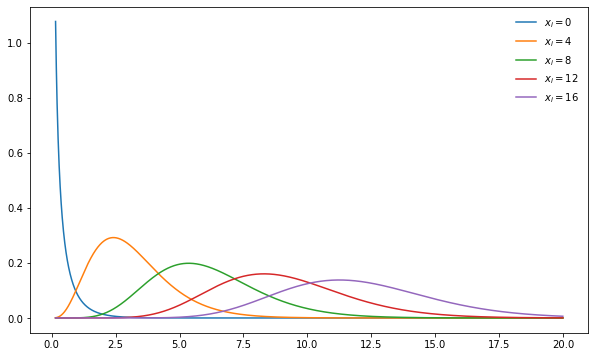

In [ ]:
from scipy.stats import gamma

fig, ax = plt.subplots(1,1)
lam=np.arange(0.15,20,0.01)

for i in range(0,18,4):
    pdf=gamma.pdf(lam, theta[0]+i, 0, theta[1]/(1+theta[1]))
    ax.plot(lam,pdf, label=r"$x_i=$"+str(i))
ax.legend(loc='best', frameon=False)
plt.show()
fig.savefig("OHIE_bayes_posterior.eps")

或者，使用Robbins公式：

In [ ]:
count=data[['person_id','num_visit_pre_cens_ed']].groupby('num_visit_pre_cens_ed').count()
count['freq']=count['person_id']/count['person_id'].sum()
del count['person_id']
count

freq
num_visit_pre_cens_ed          
0.0                    0.687262
1.0                    0.157546
2.0                    0.064707
3.0                    0.034059
4.0                    0.018064
5.0                    0.010798
6.0                    0.007185
7.0                    0.004912
8.0                    0.003369
9.0                    0.002030
10.0                   0.001746
11.0                   0.001461
12.0                   0.001177
13.0                   0.000893
14.0                   0.000934
15.0                   0.000731
16.0                   0.000406
17.0                   0.002720

In [ ]:
data=pd.merge(data, count, left_on='num_visit_pre_cens_ed', right_index=True )
data['nump1']=data['num_visit_pre_cens_ed']+1
count=count.rename(columns={'freq':'freqp1'})
data=pd.merge(data, count, left_on='nump1', right_index=True )
data['pred_num']=(data['num_visit_pre_cens_ed']+1)*data['freqp1']/data['freq']
data

person_id  sample_ed  ed_visit_09mar2008  ed_visit_30sep2009  \
0              5          1                   0                   0   
1              8          1                   0                   1   
5             23          1                   0                   0   
6             24          1                   0                   0   
8             30          1                   0                   0   
...          ...        ...                 ...                 ...   
15140      45978          1                   1                   1   
19993      60786          1                   1                   1   
22626      68691          1                   1                   1   
22843      69292          1                   1                   1   
23112      70189          1                   1                   1   

       num_visit_pre_cens_ed  pred_lambda  pred_lambda_sd      freq  nump1  \
0                        0.0     0.204139        0.387663  0.687262    1.0   
1                        0.0     0.204139        0.387663  0.687262    1.0   
5                        0.0     0.204139        0.387663  0.687262    1.0   
6                        0.0     0.204139        0.387663  0.687262    1.0   
8                        0.0     0.204139        0.387663  0.687262    1.0   
...                      ...          ...             ...       ...    ...   
15140                   14.0    10.510577        2.781657  0.000934   15.0   
19993                   14.0    10.510577        2.781657  0.000934   15.0   
22626                   14.0    10.510577        2.781657  0.000934   15.0   
22843                   14.0    10.510577        2.781657  0.000934   15.0   
23112                   14.0    10.510577        2.781657  0.000934   15.0   

         freqp1   pred_num  
0      0.157546   0.229238  
1      0.157546   0.229238  
5      0.157546   0.229238  
6      0.157546   0.229238  
8      0.157546   0.229238  
...         ...        ...  
15140  0.000731  11.739130  
19993  0.000731  11.739130  
22626  0.000731  11.739130  
22843  0.000731  11.739130  
23112  0.000731  11.739130  

[24567 rows x 11 columns]

In [ ]:
data[['num_visit_pre_cens_ed','pred_lambda','pred_num']].groupby('num_visit_pre_cens_ed').mean()

pred_lambda    pred_num
num_visit_pre_cens_ed                         
0.0                       0.204139    0.229238
1.0                       0.940314    0.821438
2.0                       1.676488    1.579046
3.0                       2.412662    2.121573
4.0                       3.148836    2.988764
5.0                       3.885010    3.992481
6.0                       4.621184    4.785311
7.0                       5.357358    5.487603
8.0                       6.093533    5.421687
9.0                       6.829707    8.600000
10.0                      7.565881    9.209302
11.0                      8.302055    9.666667
12.0                      9.038229    9.862069
13.0                      9.774403   14.636364
14.0                     10.510577   11.739130
15.0                     11.246752    8.888889
16.0                     11.982926  113.900000